In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import seaborn as sns
sns.set(style="white")
import matplotlib as mpl

In [2]:
sys.path.append('..')

In [3]:
municipalities = [355030., 130260., 150140., 410690., 150080., 351880., 130250.,
       330455., 351630., 160030.]

# data of cases for municipalities
df_mun = pd.read_csv('../Data/analyzed/age_vaccine_municipalities.csv')
# data of populations for municipalities
data_muns = pd.read_csv('../Data/age_groups_municipalities.csv')

In [4]:
data_muns

,Unnamed: 0,Municipio,0 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Total
0,0,110001,1601,1592,1556,1623,3652,3568,3101,2901,1782,812,328,22516
1,1,110002,8396,8262,8317,9490,20100,18822,15160,11695,6809,2991,1106,111148
2,2,110003,379,375,332,292,724,754,785,699,459,191,77,5067
3,3,110004,5846,5939,6065,6412,14391,14626,12374,10077,6509,2939,1238,86416
4,4,110005,1068,1097,1077,1094,2594,2648,2254,2129,1263,617,247,16088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5565,522200,962,970,884,950,2195,2229,2168,1813,1085,566,266,14088
5566,5566,522205,671,680,640,648,1414,1555,1351,1082,588,259,114,9002
5567,5567,522220,571,544,457,494,1143,1299,924,586,276,117,40,6451
5568,5568,522230,436,425,342,359,881,849,892,855,539,271,92,5941


In [5]:
df_mun = df_mun[df_mun['ID_MN_RESI'].isin(municipalities)]
df_mun['cases'] = 1
df_mun = df_mun.groupby(['ID_MN_RESI'])['cases'].sum()
df_mun = df_mun.reset_index()

In [6]:
S0 = [6.339618559366807, 21.5643593739851, 35.717702702797475, 7.268146642031216,
     9.659927819467867, 5.213425461717732, 23.296721635144145, 3.8213770604525488,
     8.14999099344686, 17.793682062894295] # susceptibility of each municipality (full)
pop = [] # population of each municipalitiy
cases = [] # cases of each municipality
for mun in municipalities:
    df_aux = df_mun[df_mun['ID_MN_RESI'] == mun]
    df_aux_pop = data_muns[data_muns['Municipio'] == mun]
    num_cases = int(df_aux['cases'])
    num_pop = int(df_aux_pop['Total'])
    cases.append(num_cases)
    pop.append(num_pop)
pop = np.array(pop)
cases = np.array(cases)
inc = (cases/pop)*(10**5)

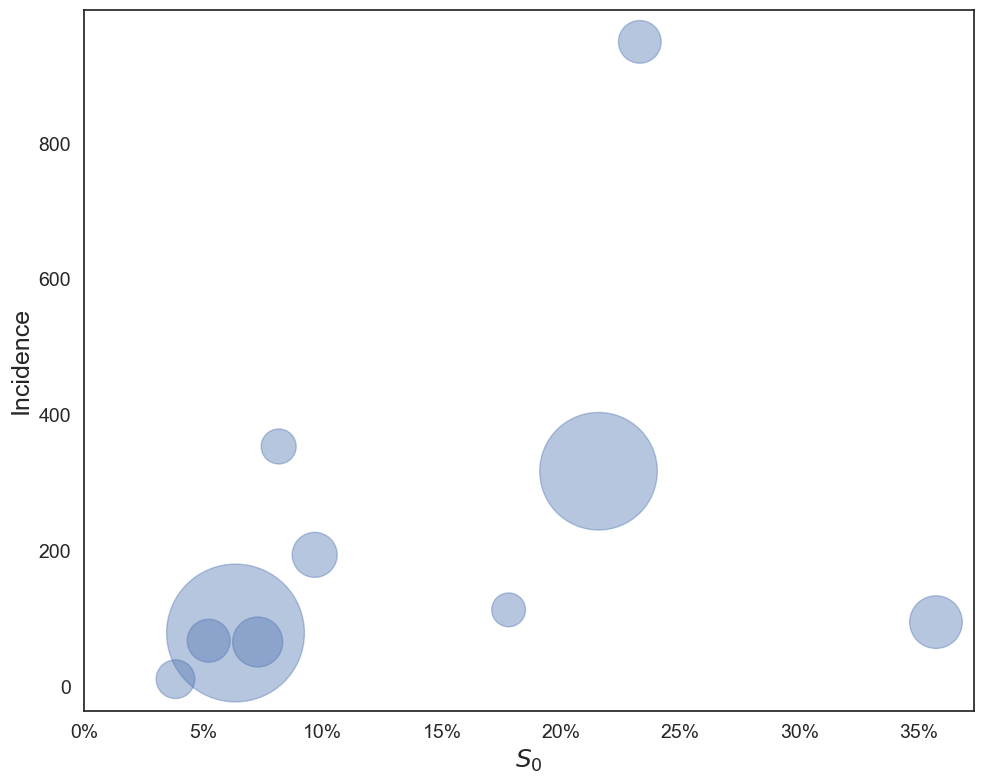

In [7]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.scatter(S0, inc, s = cases, alpha = 0.4)
xticks = np.arange(0, 40, 5)
ax.set_xticks(ticks = xticks, labels=[f"{num}%" for num in xticks])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel(r'$S_0$', fontsize = 18)
plt.ylabel('Incidence', fontsize = 18)
plt.tight_layout()
plt.savefig('../Figs/incidence_s0_plot.pdf')
plt.show()